# ***Movie Recommendation***

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Loading Data**

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/CODSOFT/IMDb Movies India.csv" , encoding="latin-1")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


**Exploratory Data Analysis**

In [ ]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.isna().sum().sum()

33523

In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df1=df.copy()
df1=df1.dropna()

In [ ]:
df1

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df1.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [ ]:
df1['Duration'] = df1['Duration'].str.replace(' min', '').astype('int')
df1['Votes'] = df1['Votes'].str.replace(',', '').astype(float)
for c in df1.columns:
  print(df1[c].value_counts())
  print("\n-------------------------\n")

Baazi                          4
Zindagi                        4
Guru                           4
Ittefaq                        3
Andaz                          3
                              ..
Gopi Kishan                    1
Gopi                           1
Gopal Krishna                  1
Goopi Gawaiya Bagha Bajaiya    1
Zulm-O-Sitam                   1
Name: Name, Length: 5385, dtype: int64

-------------------------

-2019.0    227
-2017.0    211
-2018.0    202
-2015.0    177
-2016.0    173
          ... 
-1931.0      2
-1939.0      2
-1934.0      2
-1933.0      1
-1932.0      1
Name: Year, Length: 91, dtype: int64

-------------------------

120    169
135    147
130    141
150    133
140    133
      ... 
46       1
201      1
247      1
211      1
250      1
Name: Duration, Length: 174, dtype: int64

-------------------------

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                   

**Data Visualization**

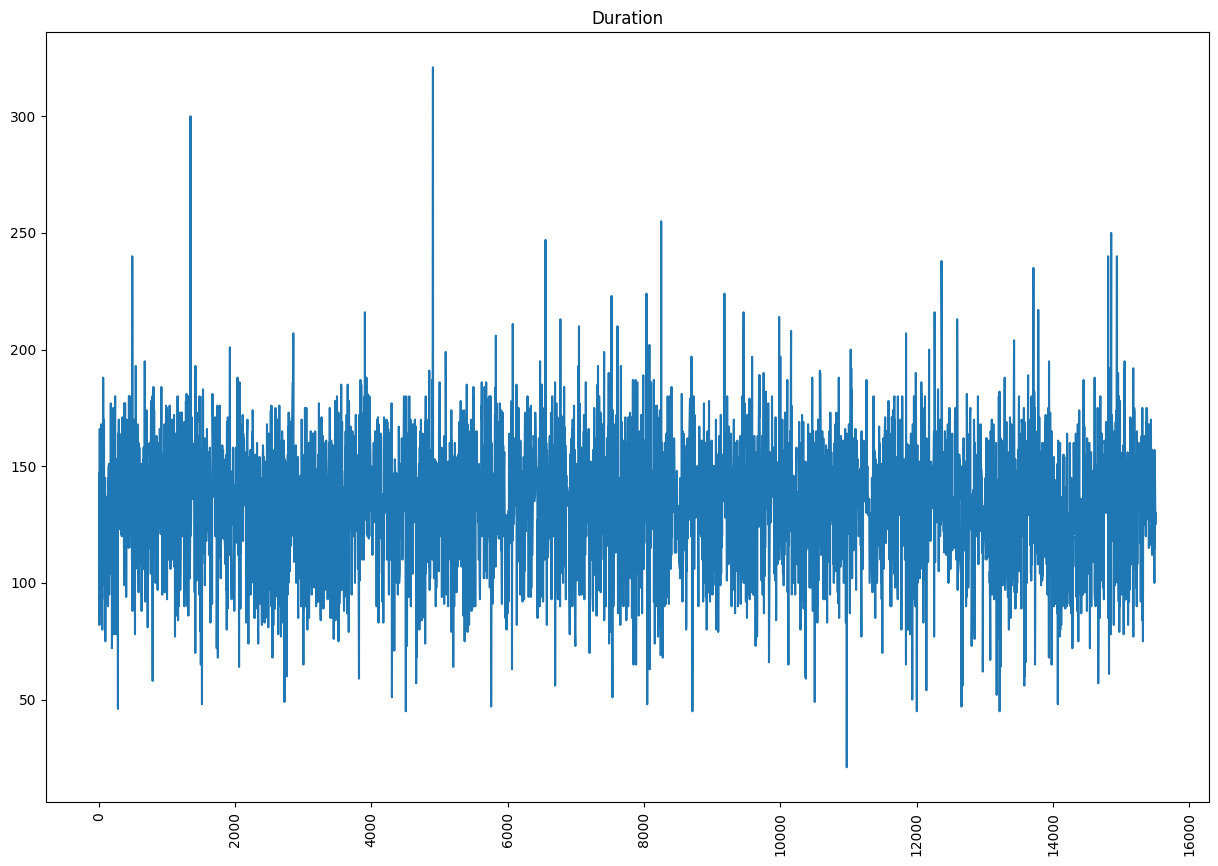

In [ ]:
df1['Duration'].plot(kind='line', figsize=(15, 10))
plt.title('Duration')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = px.histogram(df1, x='Rating', nbins=50, title='Rating', width=800, height=1000)
fig.show()

In [ ]:
dummies = df1['Genre'].str.get_dummies(', ')
df_genre = pd.concat([df1, dummies], axis=1)

genre_columns = df_genre.columns[10:]  # Assuming genre columns start from the 11th column
genre_count_by_year = df_genre.groupby('Year')[genre_columns].sum().reset_index()

fig = go.Figure()
for genre in genre_columns:
    fig.add_trace(go.Scatter(x=genre_count_by_year['Year'], y=genre_count_by_year[genre],
                             mode='lines', name=genre))

fig.update_layout(
    title='Genre Trends Over the Years',
    xaxis=dict(title='Year', titlefont_size=16),
    yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
    legend=dict(y=0, x=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)')
)
fig.show()

In [ ]:
average_rating_by_year = df1.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()
top_3_genres = df1['Genre'].value_counts().head(3).index

average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre")
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

fig.show()

<ipython-input-112-3ed1a1a51dc0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

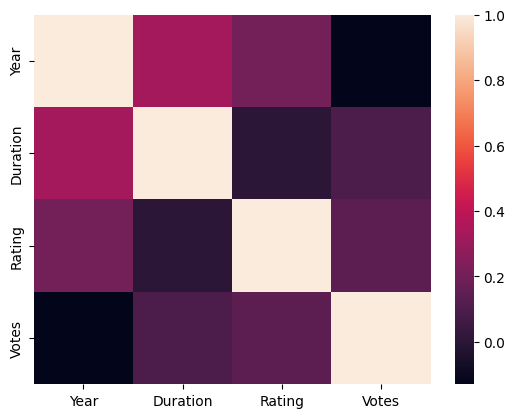

In [ ]:
sns.heatmap(df1.corr())

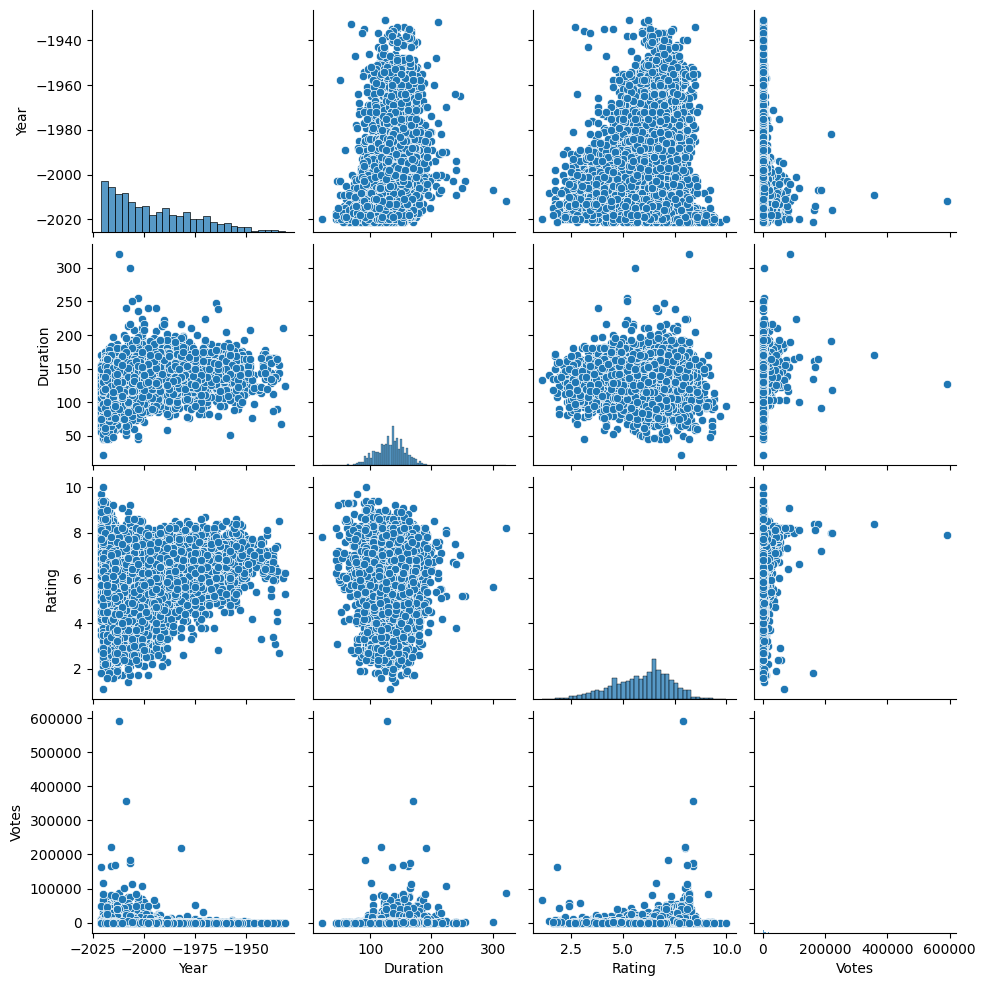

In [ ]:
sns.pairplot(df1)

**Data Preprocessing and Splitting**

In [ ]:
label_encoder = LabelEncoder()
df1['Actor 1'] = label_encoder.fit_transform(df1['Actor 1'])
df1['Actor 2'] = label_encoder.fit_transform(df1['Actor 2'])
df1['Actor 3'] = label_encoder.fit_transform(df1['Actor 3'])
df1['Genre'] = label_encoder.fit_transform(df1['Genre'])
df1['Director'] = label_encoder.fit_transform(df1['Director'])

In [ ]:
df1=df1.drop(columns=['Name','Year','Duration'] , axis=1)

In [ ]:
df1

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,229,7.0,8.0,629,1352,2272,319
3,184,4.4,35.0,1335,1198,719,2148
5,157,4.7,827.0,1530,378,75,2045
6,289,7.4,1086.0,2044,692,1112,2524
8,320,5.6,326.0,135,1934,1175,1013
...,...,...,...,...,...,...,...
15493,229,6.1,408.0,1223,1861,1801,1615
15494,133,6.2,1496.0,2059,763,1619,1184
15503,28,5.8,44.0,1793,406,754,1685
15505,38,4.5,655.0,1025,112,2164,314


In [ ]:
X,y=df1.drop("Rating",axis=1) , df1['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

**Model Building and Evaluaion**

1.Lasso Regression


Mean Squared Error (MSE): 1.7930581657148585
Root Mean Squared Error (RMSE): 1.3390512184807788
Mean Absolute Error (MAE): 1.083003629245256


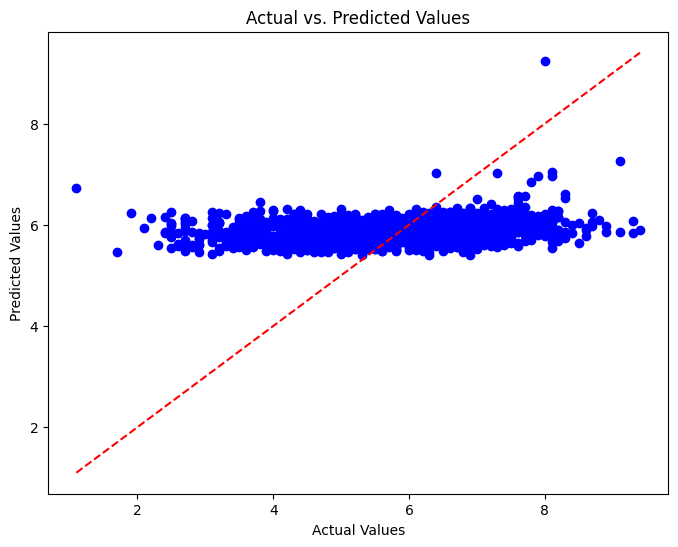

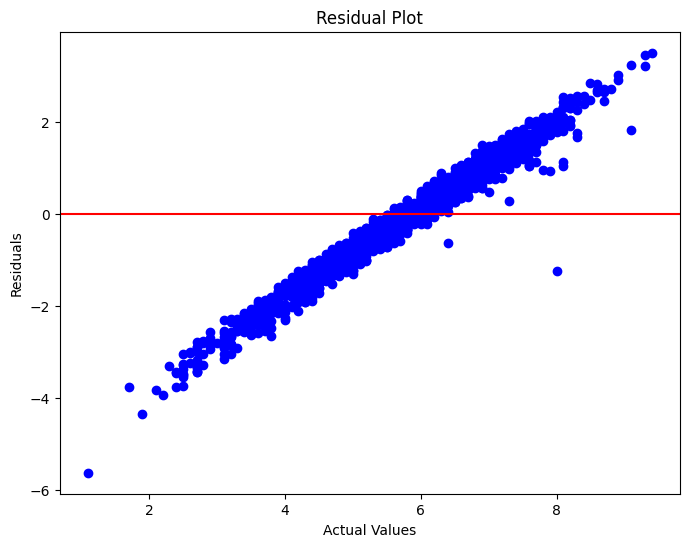

In [ ]:
regressor = Lasso(alpha=0.5)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

#  Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)

# Actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

2. Random Forest Regression

Mean Squared Error (MSE) for Random Forest Regression: 0.21929707491166067
Root Mean Squared Error (RMSE) for Random Forest Regression: 0.4682916558210926
Mean Absolute Error (MAE) for Random Forest Regression: 0.361599293286219


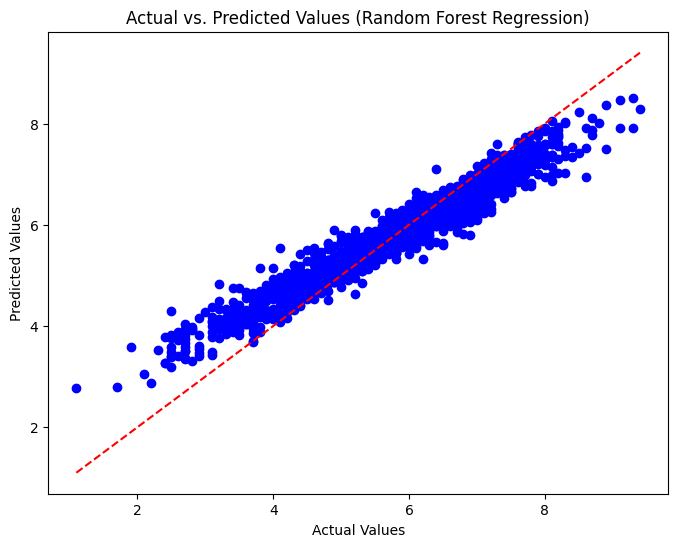

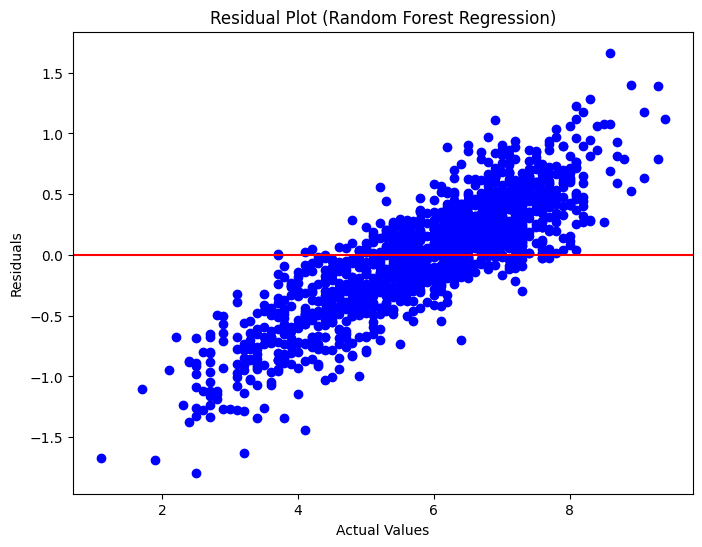

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)
y_pred_rf = rf_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE) for Random Forest Regression:", mse_rf)

# Root Mean Squared Error (RMSE)
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error (RMSE) for Random Forest Regression:", rmse_rf)

# Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE) for Random Forest Regression:", mae_rf)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.show()

# Residual Plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


3. XGBoost Regression

Mean Squared Error (MSE) for XGBoost Regression: 0.29669382228280694
Root Mean Squared Error (RMSE) for XGBoost Regression: 0.5446960824926199
Mean Absolute Error (MAE) for XGBoost Regression: 0.4060058806894524


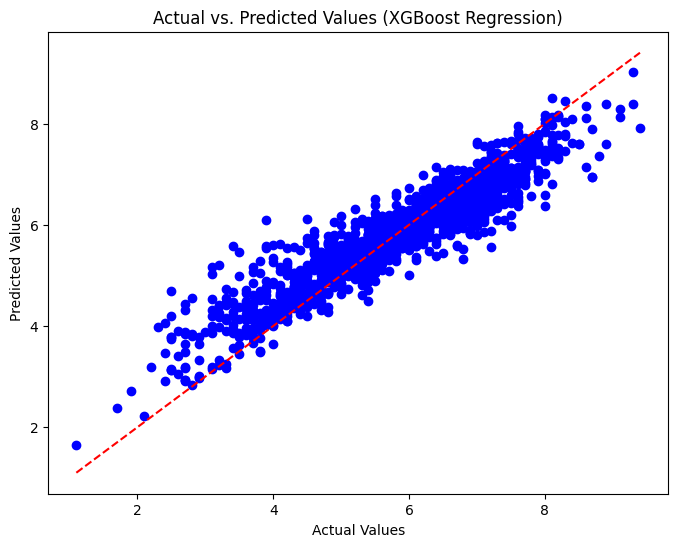

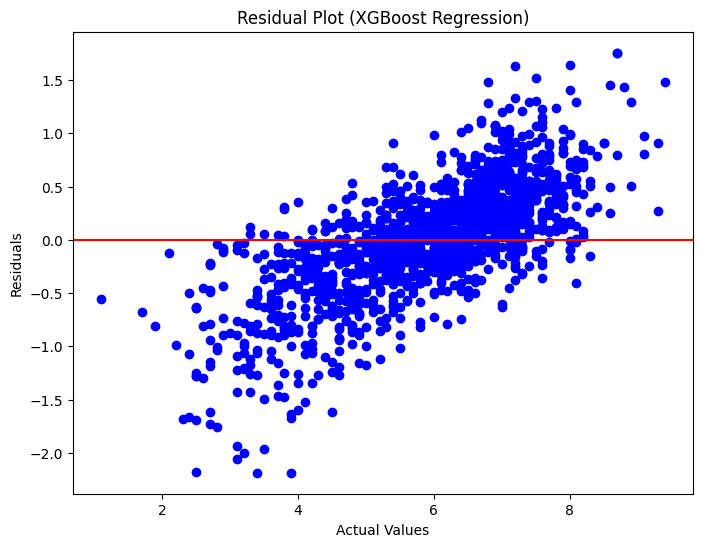

In [ ]:
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)
xgb_regressor.fit(X, y)
y_pred_xgb = xgb_regressor.predict(X_test)

# Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (MSE) for XGBoost Regression:", mse_xgb)

# Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost Regression:", rmse_xgb)

# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error (MAE) for XGBoost Regression:", mae_xgb)

plt.figure(figsize=(8, 6))

# Actual vs. predicted values
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.show()

# Residual Plot
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_xgb, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost Regression)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## **Best Model -- *Random Forest Regression***


### Mean Squared Error (MSE) for Random Forest Regression: **0.220**

### Root Mean Squared Error (RMSE) for Random Forest Regression: **0.468**

### Mean Absolute Error (MAE) for Random Forest Regression: **0.361**